<a href="https://colab.research.google.com/github/GauravRana24/yulu_hypothesis_project/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
from scipy.stats import kruskal # alternative for anova
from statsmodels.graphics.gofplots import qqplot # check normality

# **importing the dataset and basic data analysis steps**

In [3]:
# import dataset
data=pd.read_csv("yulu.csv")

In [6]:
# 5 rows from top
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
# 5 rows from bottom
data.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [9]:
# shape of data
data.shape

(10886, 12)

In [12]:
# check datatype of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
# descriptive stats
data.describe().T

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

In [16]:
# check null values
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**no null values are present in this dataset**

In [19]:
# check duplicates
data[data.duplicated()].count()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**no duplicate values in this dataset**

In [20]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [23]:
type(data["datetime"][0])

str

**date in string fromat first convert date into datetime format**

In [25]:
# convert date fromat
data["datetime"]=pd.to_datetime(data["datetime"])

In [27]:
# dateformat changed
type(data["datetime"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
data["datetime"][0]

Timestamp('2011-01-01 00:00:00')

In [29]:
# extarct year , month and week day from datetime column
data["year"]=data["datetime"].dt.year
data["month"]=data["datetime"].dt.month
# weekday start from monday = 0 and sunday =6
data["weekday"]=data["datetime"].dt.weekday
data["day"]=data["datetime"].dt.day
data["hour"]=data["datetime"].dt.hour
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  weekday  day  \
0        81        0.0       3          13     16  2011      1        5    1   
1        80        0.0       8          32     40  2011      1        5    1   
2        80        0.0       5          27     32  2011      1        5    1   
3        75        0.0       3          10     13  2011      1        5    1   
4        75        0.0       0           1      1  2011      1        5    1   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4

In [31]:
# shape change after adding extra column
data.shape

(10886, 17)

# **NON GRAPHICAL ANALYSIS**

## **univariate analysis**

In [32]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'weekday', 'day', 'hour'],
      dtype='object')

In [34]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
year              2
month            12
weekday           7
day              19
hour             24
dtype: int64

In [203]:
#checking the occurences of each of the season in percentage
''' 1 = spring
 2=summmer
 3=fall
 4=winter'''
data['season'].value_counts(normalize=True)*100

season
4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: proportion, dtype: float64

In [201]:
#checking the occurences of each of the holiday in percentage
''' holiday = 1 and regular = 0'''
data['holiday'].value_counts(normalize=True)*100

holiday
0    97.14312
1     2.85688
Name: proportion, dtype: float64

In [40]:
#checking the occurences of each of the workingday in percentage
'''weekday = 1 and weekend = 0'''
data['workingday'].value_counts(normalize=True)*100

workingday
1    68.087452
0    31.912548
Name: proportion, dtype: float64

In [202]:
#checking the occurences of each of the weather in percentage

''''1=Clear, Few clouds, partly cloudy(sunny)
2=Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist(cloudy)
3=Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds(rainy)
4=Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'''

data['weather'].value_counts(normalize=True)*100

weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: proportion, dtype: float64

In [42]:
#checking the occurences of each of the year in percentage
data['year'].value_counts(normalize=True)*100

year
2012    50.192908
2011    49.807092
Name: proportion, dtype: float64

In [45]:
#checking the occurences of each of the month in percentage
data['month'].value_counts(normalize=True)*100

month
5     8.377733
6     8.377733
7     8.377733
8     8.377733
12    8.377733
10    8.368547
11    8.368547
4     8.350175
9     8.350175
2     8.276686
3     8.276686
1     8.120522
Name: proportion, dtype: float64

In [46]:
#checking the occurences of each of the weekday in percentage
data['weekday'].value_counts(normalize=True)*100

weekday
5    14.550799
6    14.504869
3    14.266030
0    14.247658
2    14.247658
1    14.137424
4    14.045563
Name: proportion, dtype: float64

In [47]:
#checking the occurences of each of the day in percentage
data['day'].value_counts(normalize=True)*100

day
1     5.282014
9     5.282014
17    5.282014
5     5.282014
16    5.272827
15    5.272827
14    5.272827
13    5.272827
19    5.272827
8     5.272827
7     5.272827
4     5.272827
2     5.263641
12    5.263641
3     5.263641
6     5.254455
10    5.254455
11    5.217711
18    5.171780
Name: proportion, dtype: float64

In [50]:
#checking the occurences of each of the hour in percentage
data['hour'].value_counts(normalize=True)*100

hour
12    4.188866
13    4.188866
22    4.188866
21    4.188866
20    4.188866
19    4.188866
18    4.188866
17    4.188866
16    4.188866
15    4.188866
14    4.188866
23    4.188866
11    4.179680
10    4.179680
9     4.179680
8     4.179680
7     4.179680
6     4.179680
0     4.179680
1     4.170494
5     4.152122
2     4.115378
4     4.060261
3     3.977586
Name: proportion, dtype: float64

**value counts in year, month, weekday, day, hour columns data is almost same**

## **bivariate analysis**

In [51]:
# 1. Workingday -
pd.DataFrame(data.groupby('workingday')['count'].describe())

count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

In [52]:
# 2. Holiday -
pd.DataFrame(data.groupby('holiday')['count'].describe())

count        mean         std  min   25%    50%    75%    max
holiday                                                                 
0        10575.0  191.741655  181.513131  1.0  43.0  145.0  283.0  977.0
1          311.0  185.877814  168.300531  1.0  38.5  133.0  308.0  712.0

In [53]:
# 3. Season -
pd.DataFrame(data.groupby('season')['count'].describe())

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

In [54]:
# 4. Weather -
pd.DataFrame(data.groupby('weather')['count'].describe())

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

## **correlation among data**

In [232]:
data_cor=data.drop(columns={"weather_enc","season_enc"})
data_cor.corr()

datetime    season   holiday  workingday   weather      temp  \
datetime    1.000000  0.480021  0.010988   -0.003658 -0.005048  0.180986   
season      0.480021  1.000000  0.029368   -0.008126  0.008879  0.258689   
holiday     0.010988  0.029368  1.000000   -0.250491 -0.007074  0.000295   
workingday -0.003658 -0.008126 -0.250491    1.000000  0.033772  0.029966   
weather    -0.005048  0.008879 -0.007074    0.033772  1.000000 -0.055035   
temp        0.180986  0.258689  0.000295    0.029966 -0.055035  1.000000   
atemp       0.181823  0.264744 -0.005215    0.024660 -0.055376  0.984948   
humidity    0.032856  0.190610  0.001929   -0.010880  0.406244 -0.064949   
windspeed  -0.086888 -0.147121  0.008409    0.013373  0.007261 -0.017852   
casual      0.172728  0.096758  0.043799   -0.319111 -0.135918  0.467097   
registered  0.314879  0.164011 -0.020956    0.119460 -0.109340  0.318571   
count       0.310187  0.163439 -0.005393    0.011594 -0.128655  0.394454   
year        0.866570 -0.004797  0.012021   -0.002482 -0.012548  0.061226   
month       0.494087  0.971524  0.001731   -0.003394  0.012144  0.257589   
weekday    -0.004676 -0.010553 -0.191832   -0.704267 -0.047692 -0.038466   
day         0.028563  0.001729 -0.015877    0.009829 -0.007890  0.015551   
hour       -0.005663 -0.006546 -0.000354    0.002780 -0.022740  0.145430   

               atemp  humidity  windspeed    casual  registered     count  \
datetime    0.181823  0.032856  -0.086888  0.172728    0.314879  0.310187   
season      0.264744  0.190610  -0.147121  0.096758    0.164011  0.163439   
holiday    -0.005215  0.001929   0.008409  0.043799   -0.020956 -0.005393   
workingday  0.024660 -0.010880   0.013373 -0.319111    0.119460  0.011594   
weather    -0.055376  0.406244   0.007261 -0.135918   -0.109340 -0.128655   
temp        0.984948 -0.064949  -0.017852  0.467097    0.318571  0.394454   
atemp       1.000000 -0.043536  -0.057473  0.462067    0.314635  0.389784   
humidity   -0.043536  1.000000  -0.318607 -0.348187   -0.265458 -0.317371   
windspeed  -0.057473 -0.318607   1.000000  0.092276    0.091052  0.101369   
casual      0.462067 -0.348187   0.092276  1.000000    0.497250  0.690414   
registered  0.314635 -0.265458   0.091052  0.497250    1.000000  0.970948   
count       0.389784 -0.317371   0.101369  0.690414    0.970948  1.000000   
year        0.058540 -0.078606  -0.015221  0.145241    0.264265  0.260403   
month       0.264173  0.204537  -0.150192  0.092722    0.169451  0.166862   
weekday    -0.040235 -0.026507  -0.024804  0.246959   -0.084427 -0.002283   
day         0.011866 -0.011335   0.036157  0.014109    0.019111  0.019826   
hour        0.140343 -0.278011   0.146631  0.302045    0.380540  0.400601   

                year     month   weekday       day      hour  
datetime    0.866570  0.494087 -0.004676  0.028563 -0.005663  
season     -0.004797  0.971524 -0.010553  0.001729 -0.006546  
holiday     0.012021  0.001731 -0.191832 -0.015877 -0.000354  
workingday -0.002482 -0.003394 -0.704267  0.009829  0.002780  
weather    -0.012548  0.012144 -0.047692 -0.007890 -0.022740  
temp        0.061226  0.257589 -0.038466  0.015551  0.145430  
atemp       0.058540  0.264173 -0.040235  0.011866  0.140343  
humidity   -0.078606  0.204537 -0.026507 -0.011335 -0.278011  
windspeed  -0.015221 -0.150192 -0.024804  0.036157  0.146631  
casual      0.145241  0.092722  0.246959  0.014109  0.302045  
registered  0.264265  0.169451 -0.084427  0.019111  0.380540  
count       0.260403  0.166862 -0.002283  0.019826  0.400601  
year        1.000000 -0.004932 -0.003785  0.001800 -0.004234  
month      -0.004932  1.000000 -0.002266  0.001974 -0.006818  
weekday    -0.003785 -0.002266  1.000000 -0.011070 -0.002925  
day         0.001800  0.001974 -0.011070  1.000000  0.001132  
hour       -0.004234 -0.006818 -0.002925  0.001132  1.000000

In [233]:
data_cor=data.drop(columns={"weather_enc","season_enc"})
data_cor.corr(method="spearman")

datetime    season   holiday  workingday   weather      temp  \
datetime    1.000000  0.479975  0.010675   -0.003490  0.002716  0.173730   
season      0.479975  1.000000  0.029419   -0.008148  0.010918  0.248172   
holiday     0.010675  0.029419  1.000000   -0.250491 -0.002176  0.001751   
workingday -0.003490 -0.008148 -0.250491    1.000000  0.028863  0.031065   
weather     0.002716  0.010918 -0.002176    0.028863  1.000000 -0.057912   
temp        0.173730  0.248172  0.001751    0.031065 -0.057912  1.000000   
atemp       0.169826  0.246713 -0.003464    0.027566 -0.061933  0.987128   
humidity    0.029702  0.186981  0.000186   -0.010048  0.399492 -0.046854   
windspeed  -0.077944 -0.131726  0.009087    0.017455 -0.006648 -0.005535   
casual      0.187873  0.164379  0.027815   -0.200019 -0.139055  0.573034   
registered  0.296939  0.177400 -0.011585    0.063074 -0.103204  0.352174   
count       0.282349  0.176376 -0.001634   -0.000386 -0.114133  0.407989   
year        0.866019 -0.004788  0.012021   -0.002482 -0.005467  0.056906   
month       0.494003  0.971621  0.001916   -0.003481  0.015330  0.247465   
weekday    -0.004822 -0.010514 -0.191587   -0.705411 -0.048940 -0.040725   
day         0.044152  0.001725 -0.015850    0.009820 -0.003356  0.019535   
hour       -0.004815 -0.006531 -0.000355    0.002777 -0.032587  0.140206   

               atemp  humidity  windspeed    casual  registered     count  \
datetime    0.169826  0.029702  -0.077944  0.187873    0.296939  0.282349   
season      0.246713  0.186981  -0.131726  0.164379    0.177400  0.176376   
holiday    -0.003464  0.000186   0.009087  0.027815   -0.011585 -0.001634   
workingday  0.027566 -0.010048   0.017455 -0.200019    0.063074 -0.000386   
weather    -0.061933  0.399492  -0.006648 -0.139055   -0.103204 -0.114133   
temp        0.987128 -0.046854  -0.005535  0.573034    0.352174  0.407989   
atemp       1.000000 -0.042028  -0.036350  0.571588    0.350577  0.406562   
humidity   -0.042028  1.000000  -0.324447 -0.378254   -0.332785 -0.354049   
windspeed  -0.036350 -0.324447   1.000000  0.135040    0.131011  0.135777   
casual      0.571588 -0.378254   0.135040  1.000000    0.775785  0.847378   
registered  0.350577 -0.332785   0.131011  0.775785    1.000000  0.988901   
count       0.406562 -0.354049   0.135777  0.847378    0.988901  1.000000   
year        0.053554 -0.080232  -0.014582  0.120758    0.234433  0.219596   
month       0.246033  0.201920  -0.134769  0.162686    0.183523  0.180226   
weekday    -0.044801 -0.025981  -0.023399  0.159898   -0.031675  0.013497   
day         0.012928 -0.013296   0.036838  0.022789    0.020321  0.018694   
hour        0.138817 -0.282403   0.151106  0.480297    0.514831  0.515495   

                year     month   weekday       day      hour  
datetime    0.866019  0.494003 -0.004822  0.044152 -0.004815  
season     -0.004788  0.971621 -0.010514  0.001725 -0.006531  
holiday     0.012021  0.001916 -0.191587 -0.015850 -0.000355  
workingday -0.002482 -0.003481 -0.705411  0.009820  0.002777  
weather    -0.005467  0.015330 -0.048940 -0.003356 -0.032587  
temp        0.056906  0.247465 -0.040725  0.019535  0.140206  
atemp       0.053554  0.246033 -0.044801  0.012928  0.138817  
humidity   -0.080232  0.201920 -0.025981 -0.013296 -0.282403  
windspeed  -0.014582 -0.134769 -0.023399  0.036838  0.151106  
casual      0.120758  0.162686  0.159898  0.022789  0.480297  
registered  0.234433  0.183523 -0.031675  0.020321  0.514831  
count       0.219596  0.180226  0.013497  0.018694  0.515495  
year        1.000000 -0.004920 -0.003723  0.001799 -0.004232  
month      -0.004920  1.000000 -0.002265  0.001966 -0.006800  
weekday    -0.003723 -0.002265  1.000000 -0.011067 -0.002916  
day         0.001799  0.001966 -0.011067  1.000000  0.001133  
hour       -0.004232 -0.006800 -0.002916  0.001133  1.000000

# **visual analysis**

In [234]:
data_s=data['season'].value_counts(normalize=True)*100
data_s

season
4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: proportion, dtype: float64

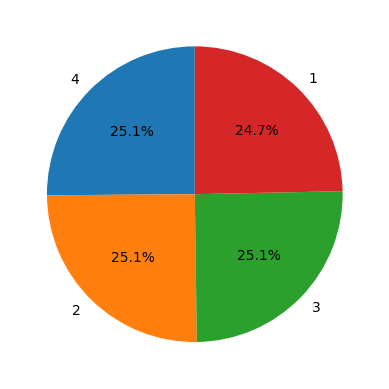

In [235]:
data_s=data['season'].value_counts(normalize=True)*100
label=[4,2,3,1]
plt.pie(data_s,labels=label,autopct='%1.1f%%',startangle=90)
plt.show()

In [236]:
data['holiday'].value_counts(normalize=True)*100

holiday
0    97.14312
1     2.85688
Name: proportion, dtype: float64

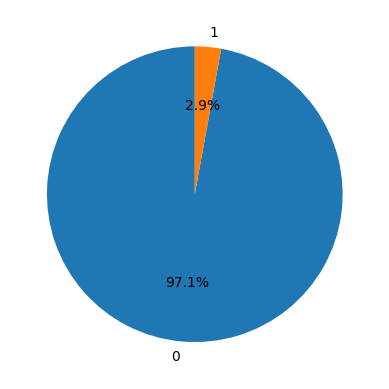

In [237]:
data_h=data['holiday'].value_counts(normalize=True)*100
label=[0,1]
plt.pie(data_h,labels=label,autopct='%1.1f%%',startangle=90)
plt.show()

In [238]:
data['workingday'].value_counts(normalize=True)*100

workingday
1    68.087452
0    31.912548
Name: proportion, dtype: float64

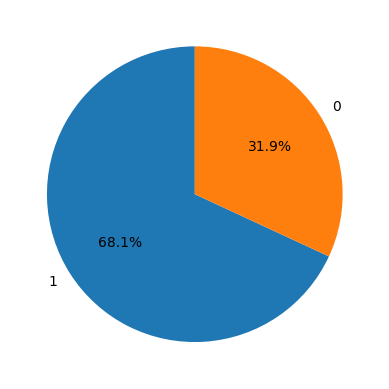

In [239]:
data_w=data['workingday'].value_counts(normalize=True)*100
label=[1,0]
plt.pie(data_w,labels=label,autopct='%1.1f%%',startangle=90)
plt.show()

In [240]:
data['weather'].value_counts(normalize=True)*100

weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: proportion, dtype: float64

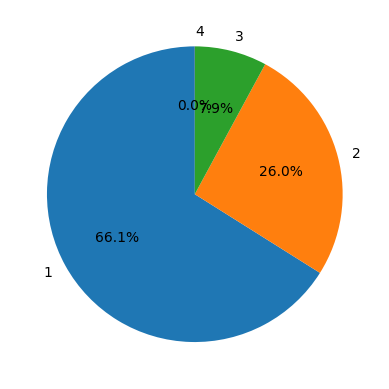

In [241]:
data_we=data['weather'].value_counts(normalize=True)*100
label=[1,2,3,4]
plt.pie(data_we,labels=label,autopct='%1.1f%%',startangle=90)
plt.show()

<Axes: >

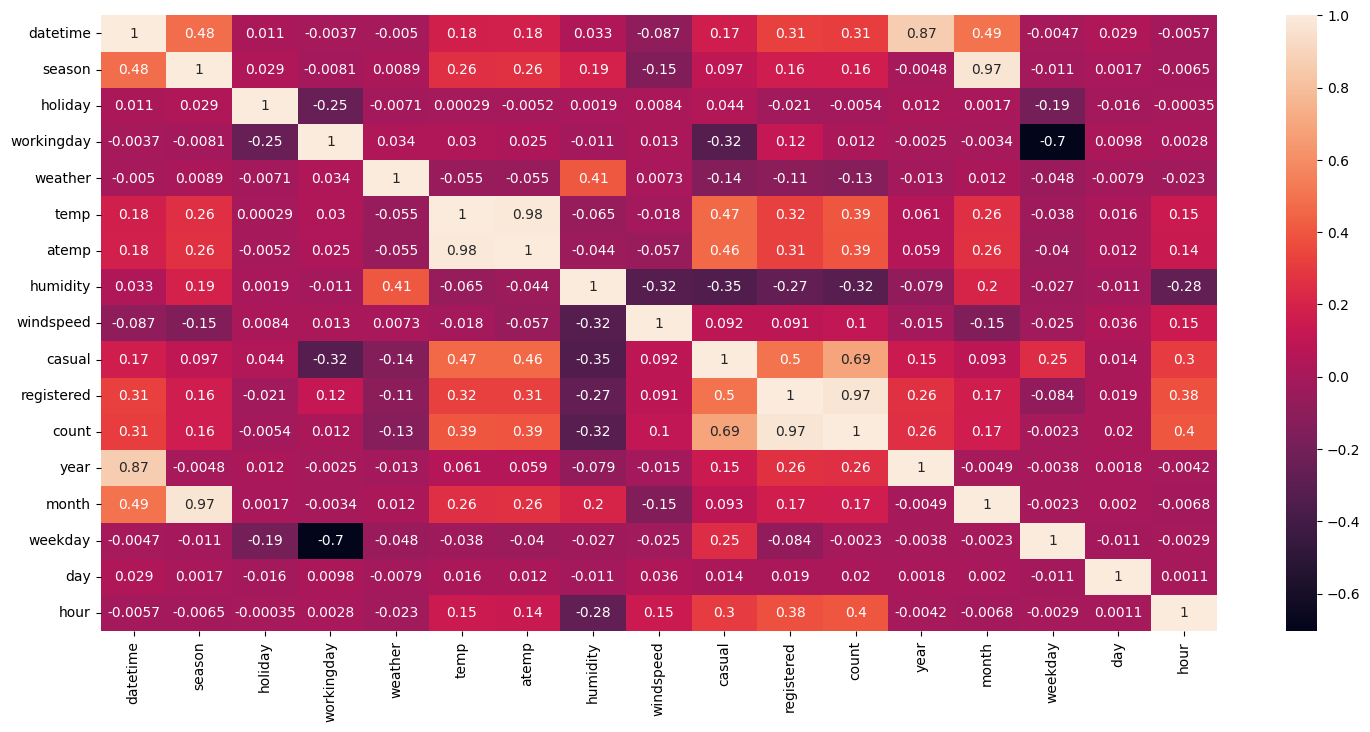

In [243]:
# correlation
data_cor=data.drop(columns={"weather_enc","season_enc"})
plt.figure(figsize=(18,8))
sns.heatmap(data_cor.corr(),annot=True)

<Axes: >

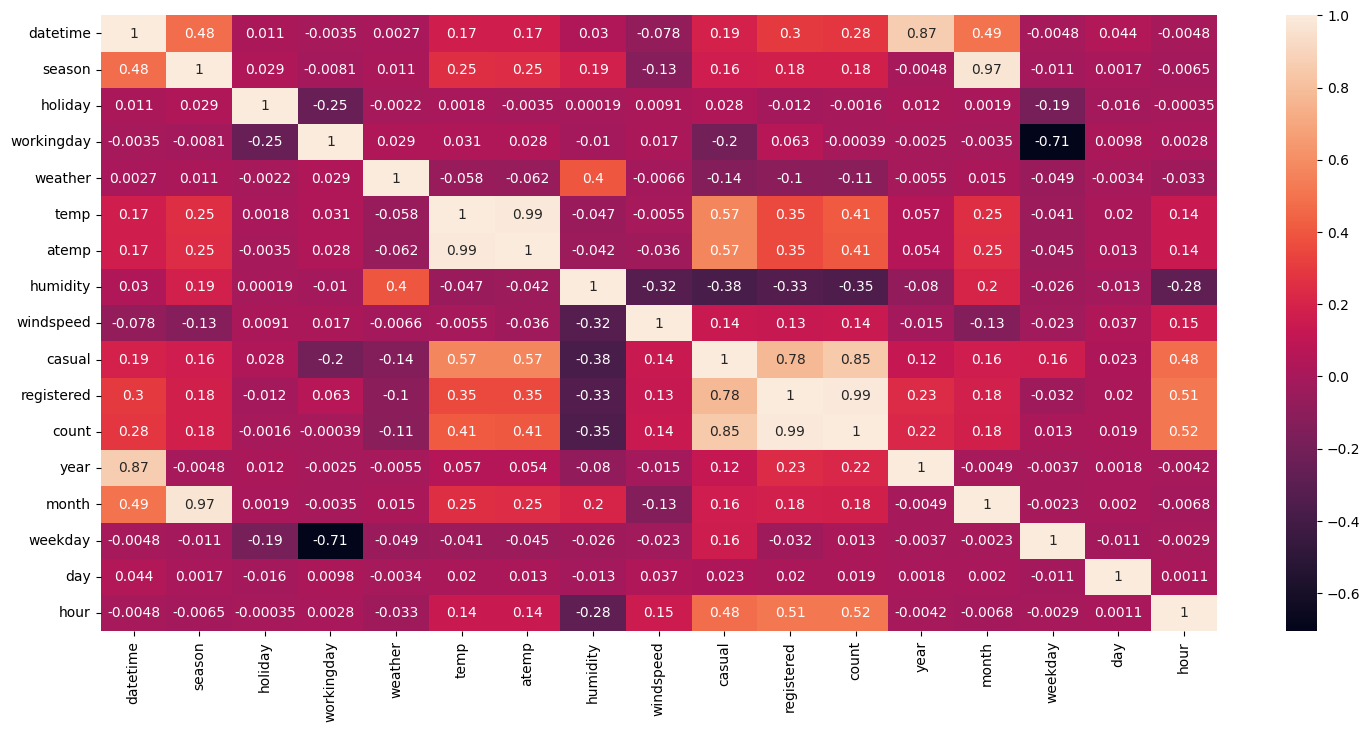

In [244]:
# correlation
data_cor=data.drop(columns={"weather_enc","season_enc"})
plt.figure(figsize=(18,8))
sns.heatmap(data_cor.corr(method="spearman"),annot=True)

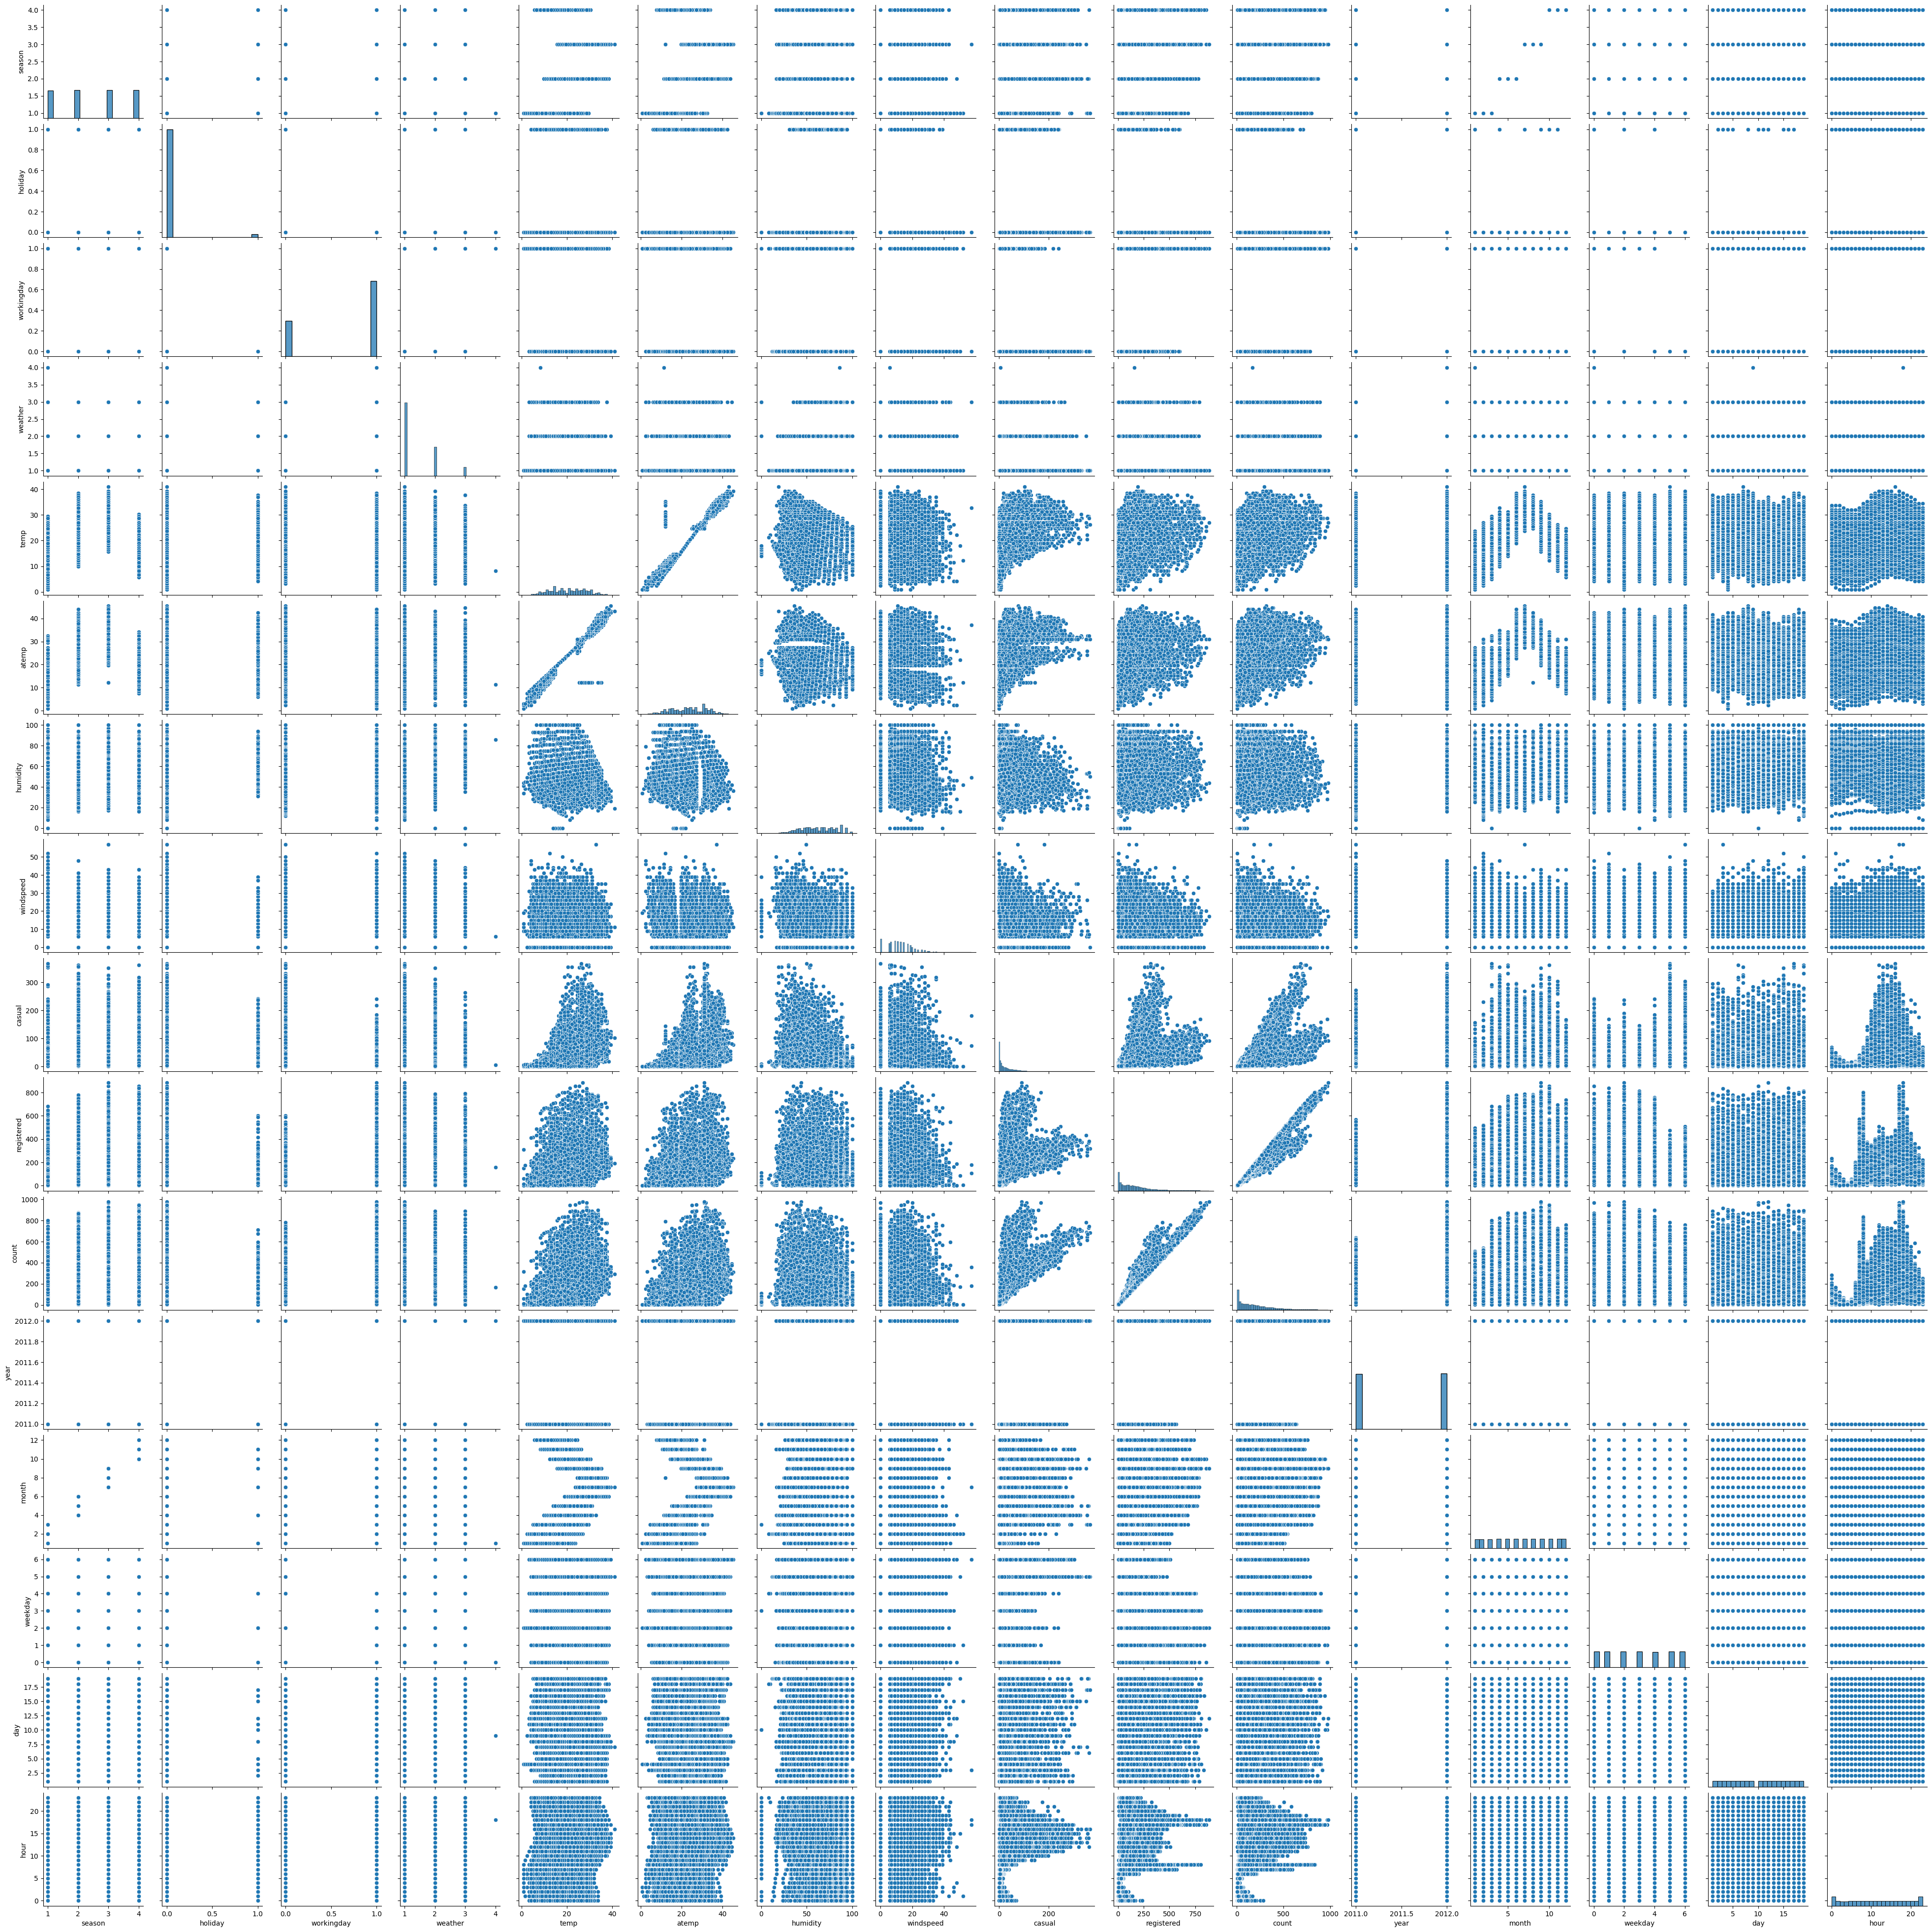

In [245]:
sns.pairplot(data)

# **outlier using boxplot**

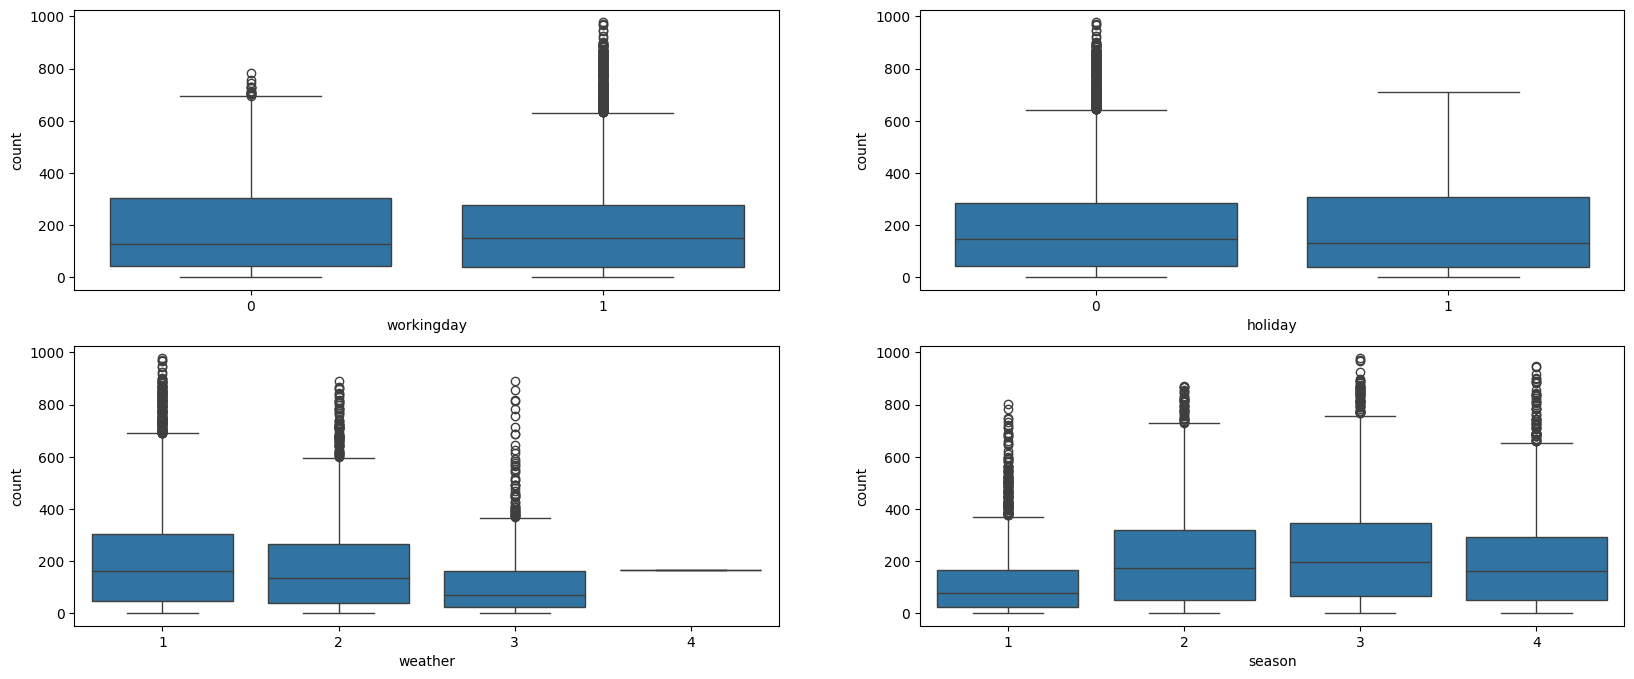

In [73]:
# checking outliers using boxplot
plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
sns.boxplot(data,x="workingday",y="count")
plt.subplot(2,2,2)
sns.boxplot(data,x="holiday",y="count")
plt.subplot(2,2,3)
sns.boxplot(data,x="weather",y="count")
plt.subplot(2,2,4)
sns.boxplot(data,x="season",y="count")
plt.show()

**check distribution of count**

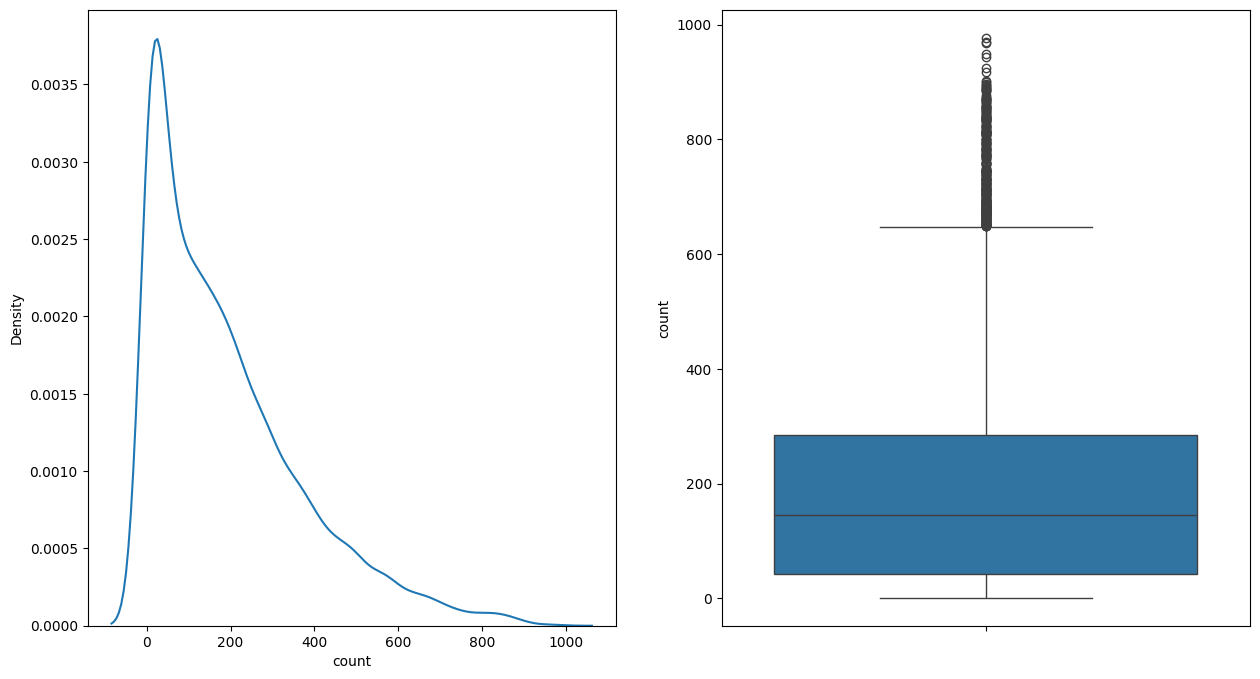

In [78]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.kdeplot(data,x="count")
plt.subplot(1, 2, 2)
sns.boxplot(data,y="count")
plt.show()

**data is not normally distributed many outlier are present**

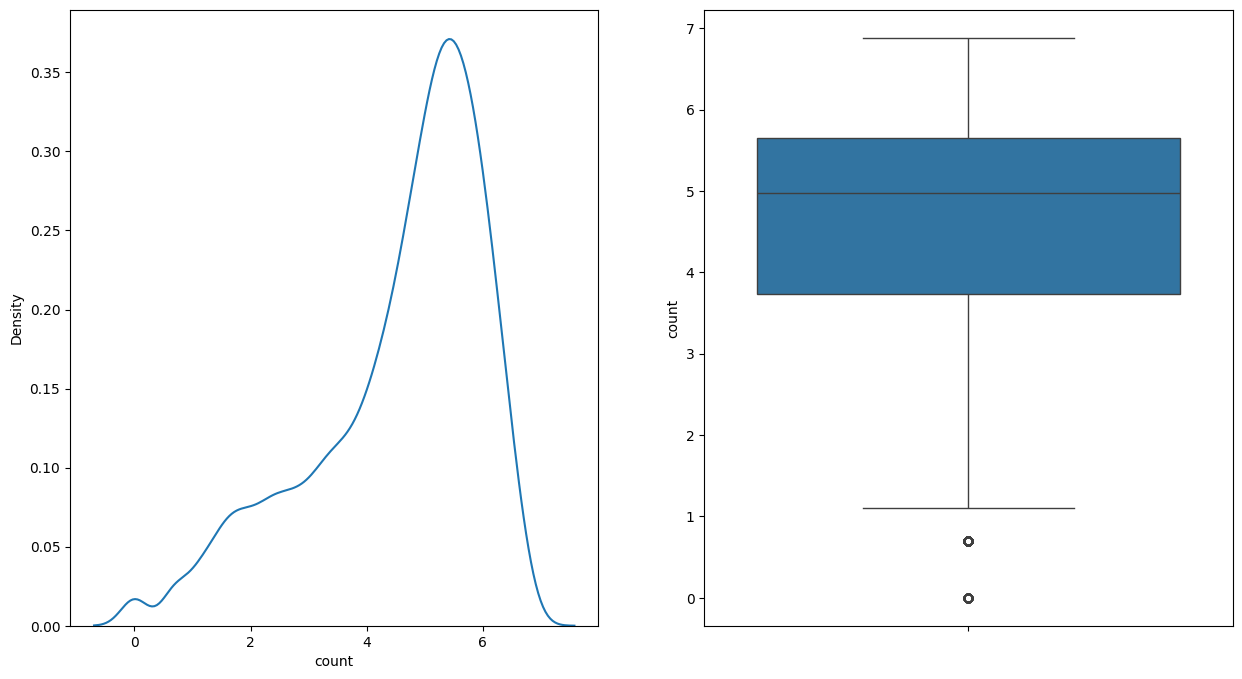

In [84]:
# apply log to data to minize the data outlier
data_1=np.log(data["count"])
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.kdeplot(data_1)
plt.subplot(1, 2, 2)
sns.boxplot(data_1)
plt.show()

**although reduce the outlier after log but data still not normalyy distributed**

# **Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

In [152]:
'''Define the null and alternate hypothesis
    H0:  The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.
    Ha:  The demand of bikes on weekdays is less than the demand of bikes on weekend.
    H0:μ1>=μ2
    Ha:μ1<μ2'''

# weekday = 1 and weekend = 0
# take smaple of 2000  for both
weekday = data[data['workingday'] == 1]['count'].sample(2000)
weekend = data[data['workingday'] == 0]['count'].sample(2000)
# standard deviation of 2 samples
print('The sample SD of the bike rides on weekday is:', round(weekday.std(), 2))
print('The sample SD of the bike rides on weekend is:', round(weekend.std(), 2))

The sample SD of the bike rides on weekday is: 181.77
The sample SD of the bike rides on weekend is: 174.77


Standrd deviation of weekday is high  according to our samples but we have to prove this through statistical tests

This is a one-tailed test .As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [153]:
# define alpha means opposite of confidence interval
alpha = 0.05
# create function for p value checker
def result(p_value, alpha):
  if p_value < alpha:
    print(f'As the p-value {p_value} is less than the alpha, we reject the H0.')
  else:
    print(f'As the p-value {p_value} is greater than the alpha, we fail to reject H0.')

# perform ttest 2 sample
test_stat, p_value = ttest_ind(weekday, weekend, alternative='less')
print('The p-value is : ', p_value)
result(p_value, alpha)

The p-value is :  0.6249151474095972
As the p-value 0.6249151474095972 is greater than the alpha, we fail to reject H0.


finding: So p-value is greater than the 5% significance level, we fail to reject the H0.

so, we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than weekends.

# **Check is there any significant difference between the no. of bike rides on regular days and holidays?**

In [157]:
''' Define the null and alternate hypothesis
   H0: The demand of bikes on regular days is greater or similar to the demand of bikes on holidays.
    Ha: The demand of bikes on regular days is less than the demand of bikes on holidays.

    H0:μ1>=μ2
    Ha:μ1<μ2'''

# holiday = 1 and regular = 0
# take smaple of 200  for both
holiday = data[data['holiday'] == 1]['count'].sample(300)
regular = data[data['holiday'] == 0]['count'].sample(300)
# standard deviation of 2 samples
print('The sample SD of the bike rides on regular is:', round(regular.std(), 2))
print('The sample SD of the bike rides on holiday is:', round(holiday.std(), 2))

The sample SD of the bike rides on regular is: 171.11
The sample SD of the bike rides on holiday is: 167.37


Standrd deviation of regular is high according to our samples but we have to prove this through statistical tests

this is a one-tailed test .As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [158]:
# define alpha means opposite of confidence interval
alpha = 0.05
# create function for p value checker
def result(p_value, alpha):
  if p_value < alpha:
    print(f'As the p-value {p_value} is less than the alpha, we reject the H0.')
  else:
    print(f'As the p-value {p_value} is greater than the alpha, we fail to reject H0.')

# perform ttest 2 sample
test_stat, p_value = ttest_ind(regular, holiday, alternative='less')
print('The p-value is : ', p_value)
result(p_value, alpha)

The p-value is :  0.5716547530564764
As the p-value 0.5716547530564764 is greater than the alpha, we fail to reject H0.


finding: So p-value is greater than the 5% significance level, we fail to reject the H0.

so, we have enough statistical evidence to say that the average no. of bike rides during regular day is greater than holidays.

# **Check if the demand of bicycles on rent is the same for different Weather conditions?**

In [200]:
# COUNT OF EACH WEATHER
''''1=Clear, Few clouds, partly cloudy
2=Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3=Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds
4=Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'''
data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [183]:
# SUMAARY OF EACH WEATHER
data.groupby(['weather'])['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

weather 4 has 1 value so no need to take this weather

In [172]:
weather_1 = data[data['weather'] == 1]['count'].sample(500)
weather_2 = data[data['weather'] == 2]['count'].sample(500)
weather_3 = data[data['weather'] == 3]['count'].sample(500)

there are 3 samples to compare so we use One-Way-ANOVA for our analysis

but ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

*   The samples are independent.
*   Each sample is from a normally distributed population.
*   The population variance of the groups are all equal.





to check normality of data we used different methods



*   see bell curve using histogram or kde
*   Q-Q plot
*   shapiro test

to check homegeneity of variance of samples we used


*   levene test









 **A. check normaltiy of data**

<Axes: xlabel='count', ylabel='Density'>

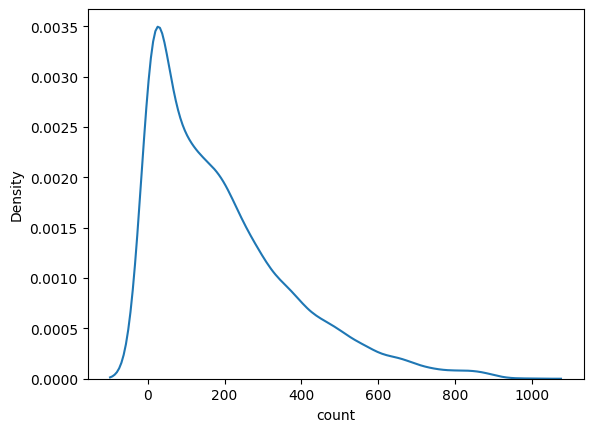

In [163]:
# methon 1 see bell curve using kernel density plot
data_2=data["count"].sample(5000)
sns.kdeplot(data_2)

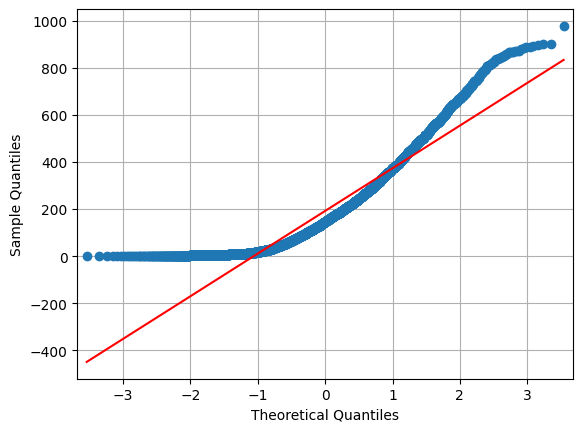

In [168]:
# method 2 using Q-Q plot
qqplot(data_2,line="s")
plt.grid()
plt.show()

In [174]:
# method 3 shapiro test
'''H0= Data is gaussian
   Ha= Data is not gaussain'''

data_3=data["count"].sample(200)
s_test,p_value=shapiro(data_3)

# perform shapiro test
s_test,p_value=shapiro(data_3)
print('The p-value is : ', p_value)
result(p_value, alpha)

The p-value is :  1.2003022187290213e-10
As the p-value 1.2003022187290213e-10 is less than the alpha, we reject the H0.


so p value is less than alpha we reject our H0 which is data is gaussian , so we can conclude that data is not gaussain

**from the above 3 method we can say that data is not normalyy distributed**

**B. check homogeneity of variance **

In [175]:
# mehtod 1 levene test
'''H0= variance of all group are same
  Ha = variance of atleast one group is different'''

stat, p_value = levene(weather_1, weather_2, weather_3)
print('The p-value is : ', p_value)

result(p_value, alpha)


The p-value is :  2.5648456904339504e-09
As the p-value 2.5648456904339504e-09 is less than the alpha, we reject the H0.


In [179]:
# VARIANCE OF ALL GROUPS
print(weather_1.var(),weather_2.var(),weather_3.var())

31546.27873346694 26677.266448897797 17934.50701002004


In [178]:
# anova test perform
'''H0= mean of all group are same
  Ha= mean of atleast one group is different'''
test_stat, p_value = f_oneway(weather_1, weather_2, weather_3)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  9.35731086080769e-19
As the p-value 9.35731086080769e-19 is less than the alpha, we reject the H0.


so p value is less than alpha we reject H0 which is mean of all groups are same .

we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.

# **Check if the demand of bicycles on rent is the same for different Seasons?**

In [199]:
#COUNT OF EACH SEASON
''' 1 = spring
 2=summmer
 3=fall
 4=winter'''
data['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [187]:
# sumaary of each SEASON
data.groupby(['season'])['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

In [194]:
# CREATE SAMPLE OF 2000 FOR EACH SEASON
season_1 = data[data['season'] == 1]['count'].sample(2000)
season_2 = data[data['season'] == 2]['count'].sample(2000)
season_3 = data[data['season'] == 3]['count'].sample(2000)
season_4 = data[data['season'] == 4]['count'].sample(2000)

there are 4 samples to compare so we use One-Way-ANOVA for our analysis

but ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.
Each sample is from a normally distributed population.
The population variance of the groups are all equal.
to check normality of data we used different methods


*   see bell curve using histogram or kde

*   Q-Q plot
*   shapiro test

to check homegeneity of variance of samples we used

*   levene test




A. check normaltiy of data

<Axes: xlabel='count', ylabel='Density'>

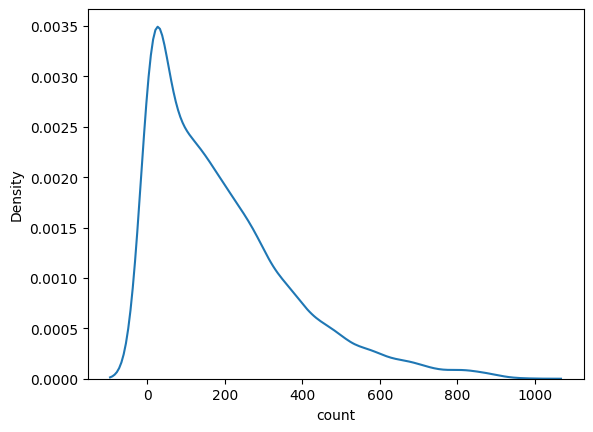

In [191]:
# methon 1 see bell curve using kernel density plot
data_2=data["count"].sample(5000)
sns.kdeplot(data_2)

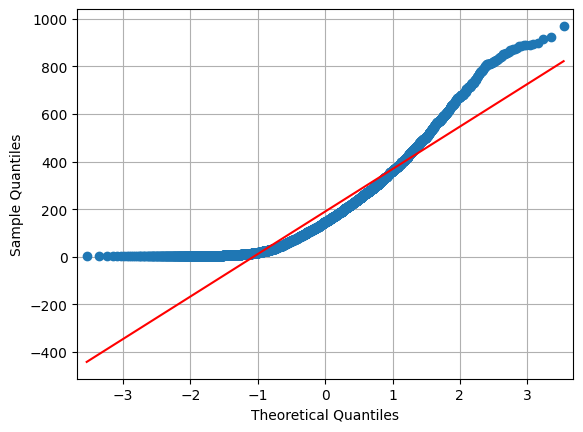

In [192]:
# method 2 using Q-Q plot
qqplot(data_2,line="s")
plt.grid()
plt.show()

In [195]:
# method 3 shapiro test
'''H0= Data is gaussian
   Ha= Data is not gaussain'''
data_3=data["count"].sample(200)
s_test,p_value=shapiro(data_3)

# perform shapiro test
s_test,p_value=shapiro(data_3)
print('The p-value is : ', p_value)
result(p_value, alpha)

The p-value is :  1.2435726060022745e-10
As the p-value 1.2435726060022745e-10 is less than the alpha, we reject the H0.


sp p value is less than alpha we reject our H0 which is data is gaussian , so we can conclude that data is not gaussain

from the above 3 method we can say that data is not normalyy distributed

homogeneity of variance

In [196]:
# mehtod 1 levene test
'''H0= variance of all group are same
  Ha = variance of atleast one group is different'''

stat, p_value = levene(season_1, season_2, season_3,season_4)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  1.818232020861006e-91
As the p-value 1.818232020861006e-91 is less than the alpha, we reject the H0.


In [197]:
# VARIANCE OF ALL GROUPS
print(season_1.var(),season_2.var(),season_3.var(),season_4.var())

15465.157296398202 36545.59199574788 39826.14847423712 30656.18310930465


In [198]:
''' H0:  The average no. of bike rides in different seasons are equal.
    Ha:  The average no. of bike rides in different seasons are not equal '''
#perform anova test
test_stat, p_value = f_oneway(season_1, season_2, season_3,season_4)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  8.61265286667856e-117
As the p-value 8.61265286667856e-117 is less than the alpha, we reject the H0.


finding: Since the p-value is less then the alpha, we reject H0.

Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal.

# **Check if the Weather conditions are significantly different during different Seasons?**

In [204]:
#COUNT OF EACH SEASON
''' 1 = spring
 2=summmer
 3=fall
 4=winter'''
data['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [206]:
# COUNT OF EACH WEATHER
''''1=Clear, Few clouds, partly cloudy(sunny)
2=Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist(cloudy)
3=Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds(rainy)
4=Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog(heavy rainy)'''
data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

data values in 'season' and 'weather' columns are numerical they still represent different catgories. so, we will encode them accordingly before moving onto the tests.

In [209]:
# use of map function to encode the weather column
dict1 = {1: 'Sunny',
         2: 'Cloudy',
         3: 'Rainy'}
data['weather_enc'] = data['weather'].map(dict1)

In [210]:
# use of map function to encode the season column
dict2 = {1: 'Summer',
         2: 'Monsoon',
         3: 'Winter',
         4: 'Autumn'}
data['season_enc'] = data['season'].map(dict2)

**there are two categorcial columns so we use chi square test**

In [213]:
conti_table=  pd.crosstab(data["season_enc"], data["weather_enc"])
conti_table

weather_enc  Cloudy  Rainy  Sunny
season_enc                       
Autumn          807    225   1702
Monsoon         708    224   1801
Summer          715    211   1759
Winter          604    199   1930

<Axes: xlabel='season_enc'>

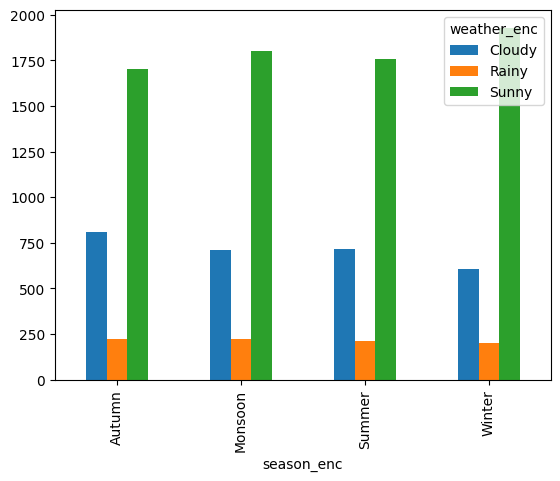

In [222]:
conti_table.plot(kind='bar')

In [225]:
'''H0:  Weather conditions are independent of the season.
    Ha: Weather condition depends on the ongoing season.'''
# perform chi2_contingency test
chi2, pval, dof, exp_freq = chi2_contingency(conti_table, correction=False)
print(f'Chi-square Statistic: {chi2} \n P-value: {pval} \n DOF: {dof} \n Expected Frequencies: {exp_freq}')

Chi-square Statistic: 46.10145731073249 
 P-value: 2.8260014509929343e-08 
 DOF: 6 
 Expected Frequencies: [[ 711.81956821  215.75617823 1806.42425356]
 [ 711.55920992  215.67726229 1805.76352779]
 [ 699.06201194  211.8892972  1774.04869086]
 [ 711.55920992  215.67726229 1805.76352779]]


In [226]:
result(pval, alpha)

As the p-value 2.8260014509929343e-08 is less than the alpha, we reject the H0.


finding: Since the p-value is less than alpha, we reject H0.

Hence, we have enough statistical evidence to say that the weather conditions are dependent on the seasons

# **INSIGHTS**



*   68% demands of bikes on Weekdays and 97% demand are on regular days

*   Number of rides is dependent on Weather , 66% rides are on weather 1 (sunny).
*  There is only one ride in Heavy rain condition

insight from  hypothesis testing



*   the average no. of bike rides during weekdays is greater than weekends.
*   the average no. of bike rides during regular day is greater than holidays.
*   the average no. of bike rides in different weather conditions are not equal.
*   the average no. of bike rides in different seasons are not equal.
*   weather conditions are dependent on the seasons








# **recommendations**

* Weekdays and regular days has more Rides, i.e. working people are using more for commute. Yulu can track busy route and setup more efficient yulu plan.

* On holiday and weekend yulu can keep fun contest to engage more users and increase more brand awareness.

* As heavy rain is affecting most to the No. of rides. Yulu can redesign the costing of per ride according to weather by reducing rates on rainy slight increasing rate on sunny and clear day.

* company maintain the bike stocks according to weather and working days
